<a href="https://colab.research.google.com/github/rupaas/Explainable-Ai/blob/main/2049_Lab2_XAI_6ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[Kidney Dataset](https://www.kaggle.com/datasets/mansoordaku/ckdisease/data)

##EDA : Exploratory Data Analysis

In [ ]:
import pandas as pd

In [ ]:
data = pd.read_csv("kidney_disease.csv")
data.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [ ]:
data.columns

Index(['id', 'age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr',
       'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

In [ ]:
data['classification'].unique()

array(['ckd', 'ckd\t', 'notckd'], dtype=object)

In [ ]:
data[data.select_dtypes(include='object').columns] = data.select_dtypes(include='object').apply(lambda x: x.str.strip())

id – Patient ID

age – Age (years)

bp – Blood Pressure (mm/Hg)

sg – Specific Gravity

al – Albumin

su – Sugar

rbc – Red Blood Cells

pc – Pus Cell

pcc – Pus Cell Clumps

ba – Bacteria

bgr – Blood Glucose Random (mgs/dl)

bu – Blood Urea (mgs/dl)

sc – Serum Creatinine (mgs/dl)

sod – Sodium (mEq/L)

pot – Potassium (mEq/L)

hemo – Hemoglobin (gms)

pcv – Packed Cell Volume

wc – White Blood Cell Count (cells/cumm)

rc – Red Blood Cell Count (millions/cmm)

htn – Hypertension

dm – Diabetes Mellitus

cad – Coronary Artery Disease

appet – Appetite

pe – Pedal Edema

ane – Anemia

classification – CKD/Not CKD (target variable)

In [ ]:
data = data.drop(columns=["id"])

In [ ]:
# Inspect shape
print("Shape:", data.shape)

Shape: (400, 25)


In [ ]:
# Inspect datatypes
print("\nData types:\n", data.dtypes)


Data types:
 age               float64
bp                float64
sg                float64
al                float64
su                float64
rbc                object
pc                 object
pcc                object
ba                 object
bgr               float64
bu                float64
sc                float64
sod               float64
pot               float64
hemo              float64
pcv                object
wc                 object
rc                 object
htn                object
dm                 object
cad                object
appet              object
pe                 object
ane                object
classification     object
dtype: object


In [ ]:
# Check missing values
print("\nMissing values:\n", data.isnull().sum())


Missing values:
 age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                70
wc                105
rc                130
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64


In [ ]:
from sklearn.impute import SimpleImputer

# Drop columns with >30% missing values
threshold = 0.3 * len(data)
data = data.drop(columns=[col for col in data.columns if data[col].isnull().sum() > threshold])

# Separate numeric and categorical columns
num_cols = data.select_dtypes(include=['float64', 'int64']).columns
cat_cols = data.select_dtypes(include=['object']).columns

# Impute numeric with median, categorical with mode
num_imputer = SimpleImputer(strategy='median')
cat_imputer = SimpleImputer(strategy='most_frequent')

data[num_cols] = num_imputer.fit_transform(data[num_cols])
data[cat_cols] = cat_imputer.fit_transform(data[cat_cols])

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# 1. Summary statistics
print(data.describe(include='all'))

               age          bp          sg         al          su      pc  \
count   400.000000  400.000000  400.000000  400.00000  400.000000     400   
unique         NaN         NaN         NaN        NaN         NaN       2   
top            NaN         NaN         NaN        NaN         NaN  normal   
freq           NaN         NaN         NaN        NaN         NaN     324   
mean     51.562500   76.575000    1.017712    0.90000    0.395000     NaN   
std      16.982996   13.489785    0.005434    1.31313    1.040038     NaN   
min       2.000000   50.000000    1.005000    0.00000    0.000000     NaN   
25%      42.000000   70.000000    1.015000    0.00000    0.000000     NaN   
50%      55.000000   80.000000    1.020000    0.00000    0.000000     NaN   
75%      64.000000   80.000000    1.020000    2.00000    0.000000     NaN   
max      90.000000  180.000000    1.025000    5.00000    5.000000     NaN   

               pcc          ba         bgr          bu  ...       hemo  pcv

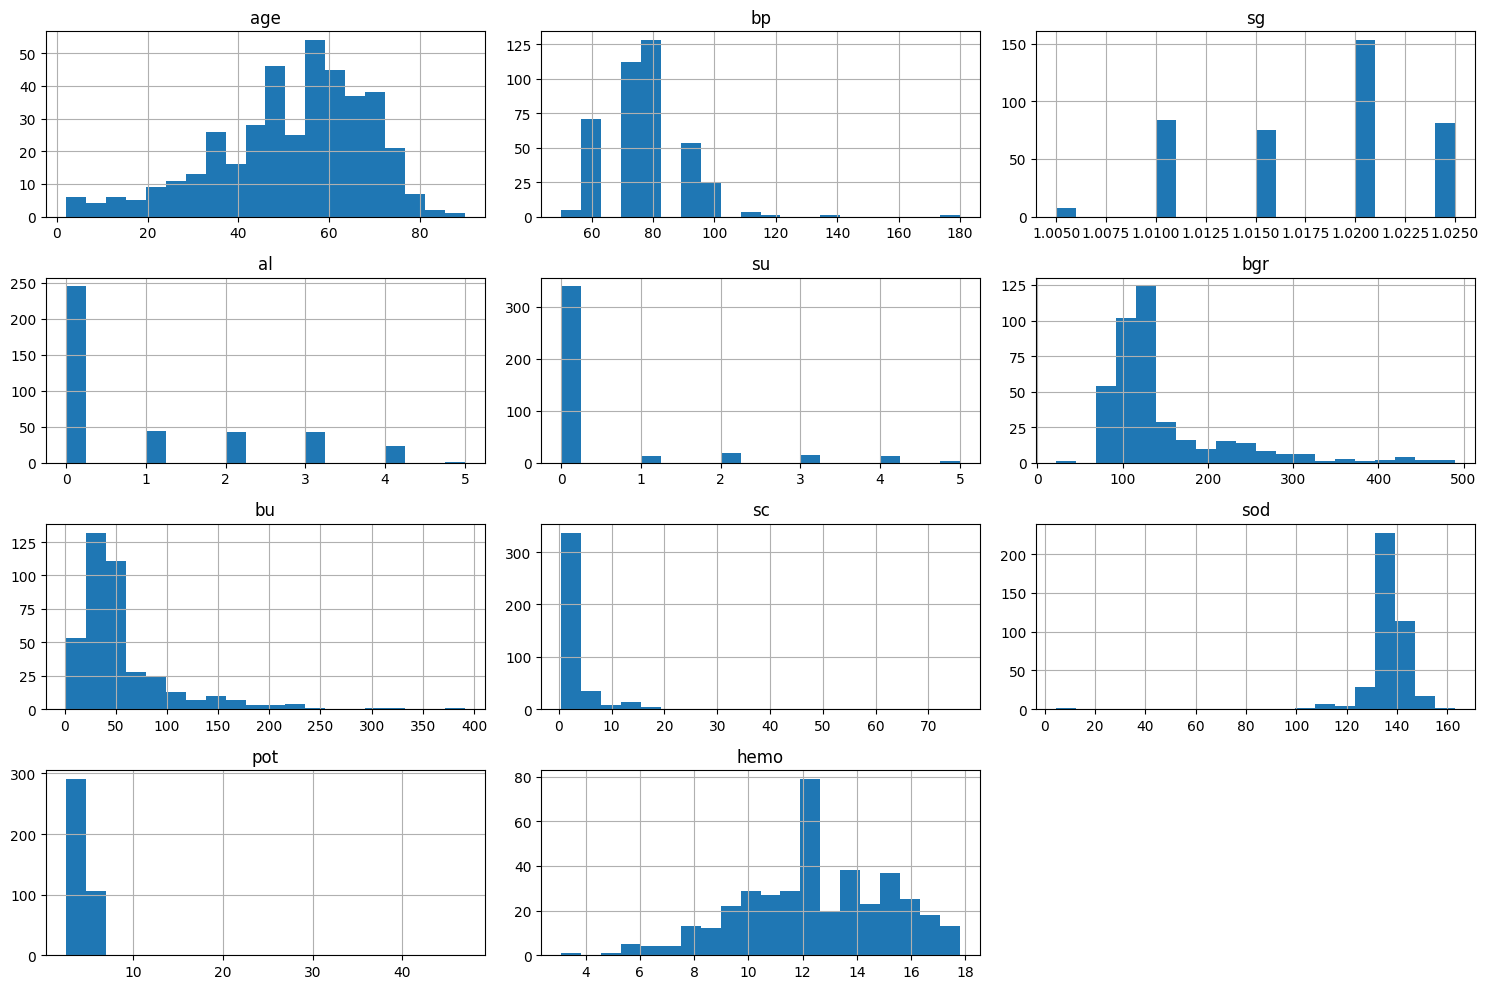

In [ ]:
# 2. Distribution plots for numeric columns
num_cols = data.select_dtypes(include=['float64', 'int64']).columns
data[num_cols].hist(figsize=(15,10), bins=20)
plt.tight_layout()
plt.show()

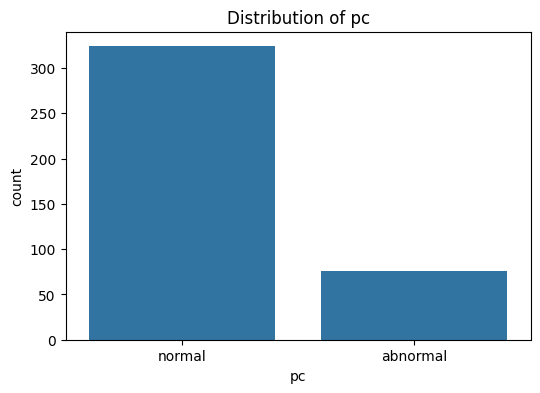

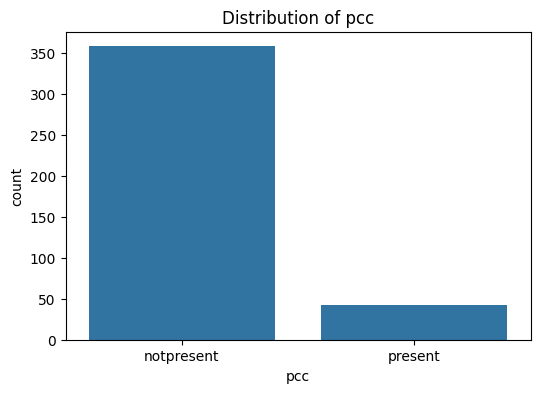

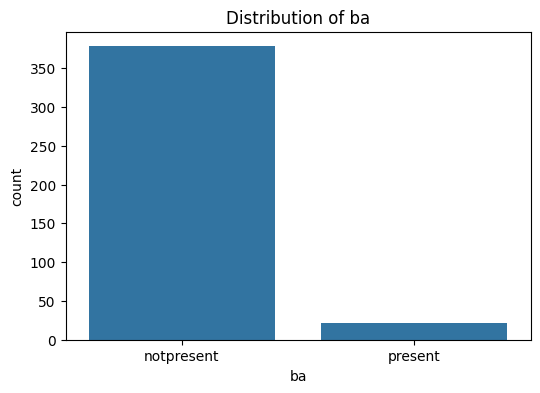

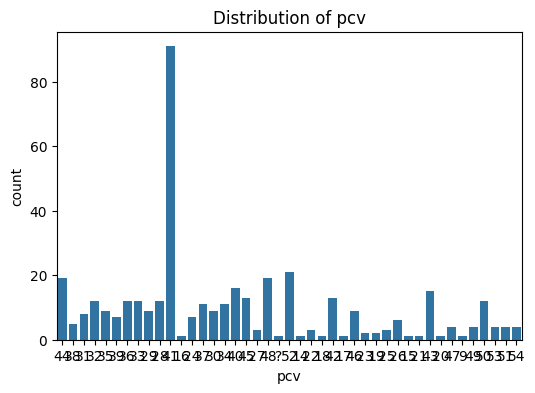

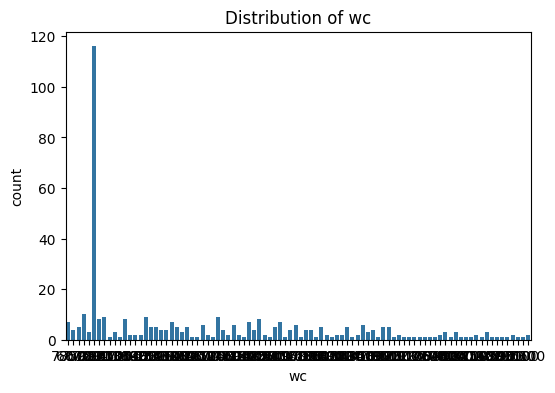

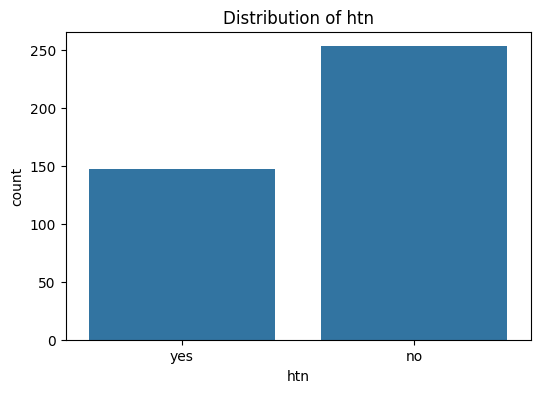

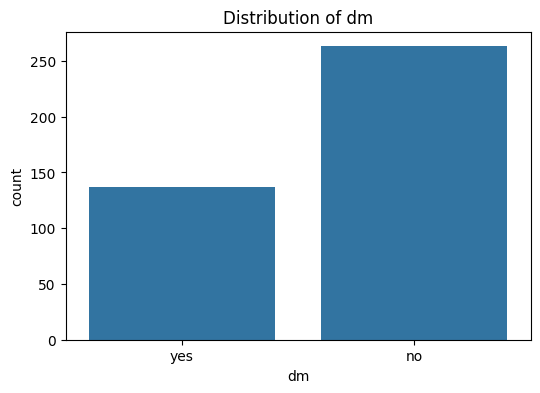

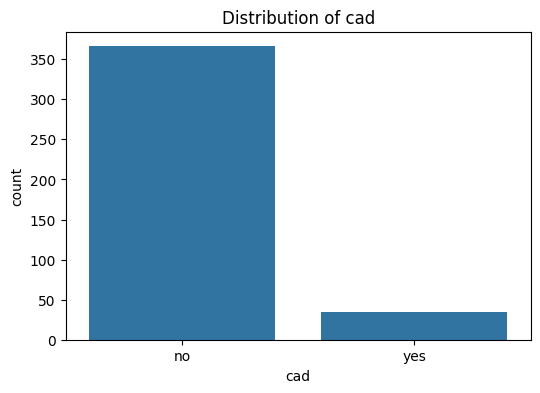

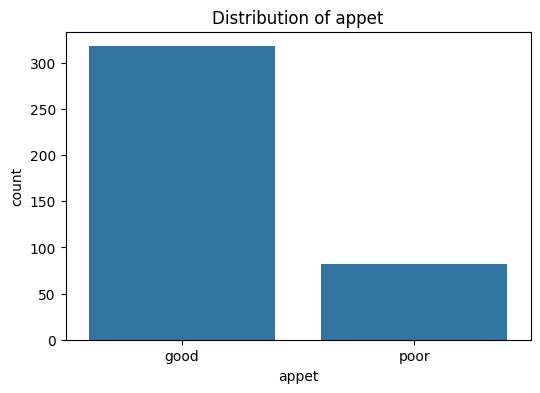

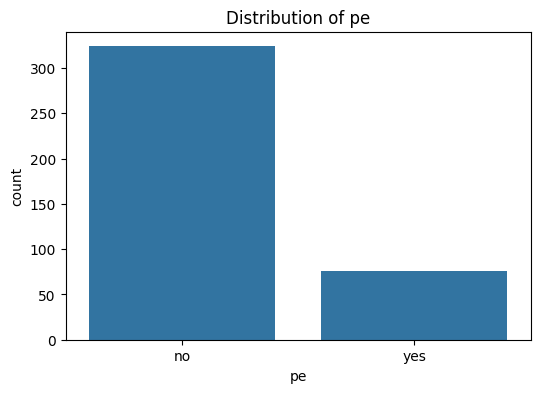

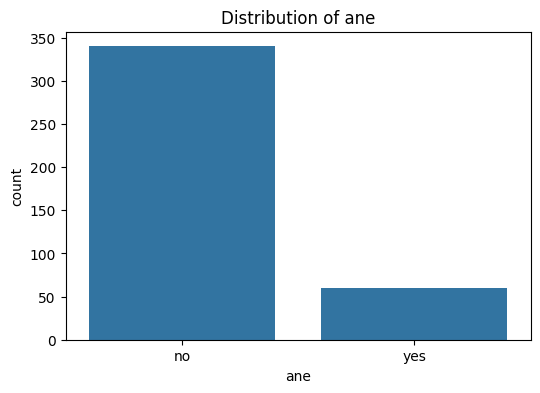

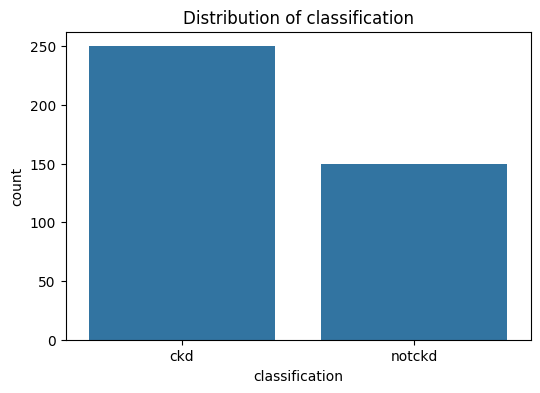

In [ ]:
# 3. Count plots for categorical columns
cat_cols = data.select_dtypes(include=['object']).columns
for col in cat_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(x=col, data=data)
    plt.title(f'Distribution of {col}')
    plt.show()

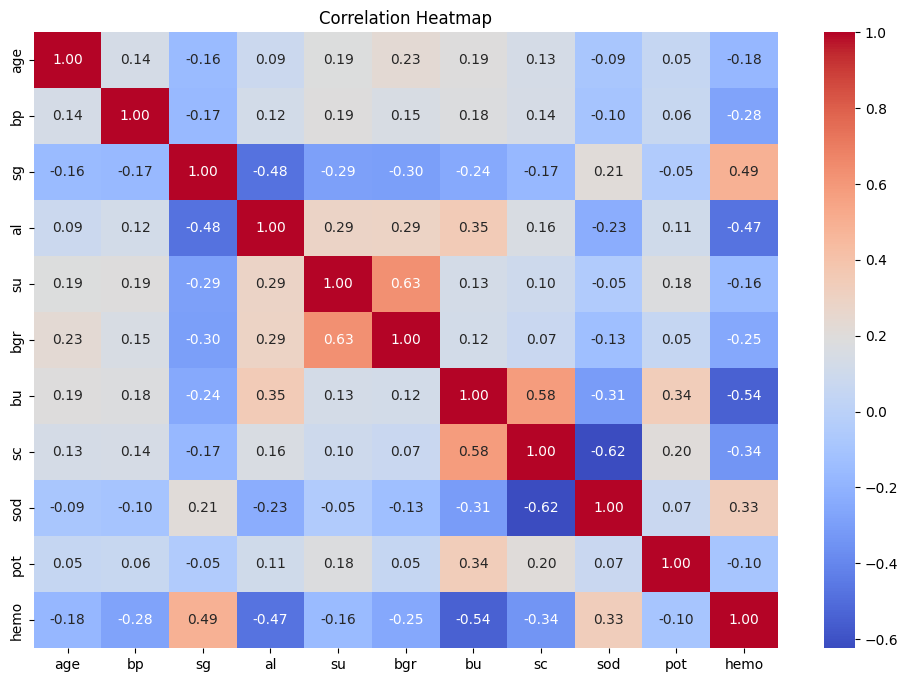

In [ ]:
# 4. Correlation heatmap for numeric columns
plt.figure(figsize=(12,8))
sns.heatmap(data[num_cols].corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

classification
ckd       250
notckd    150
Name: count, dtype: int64


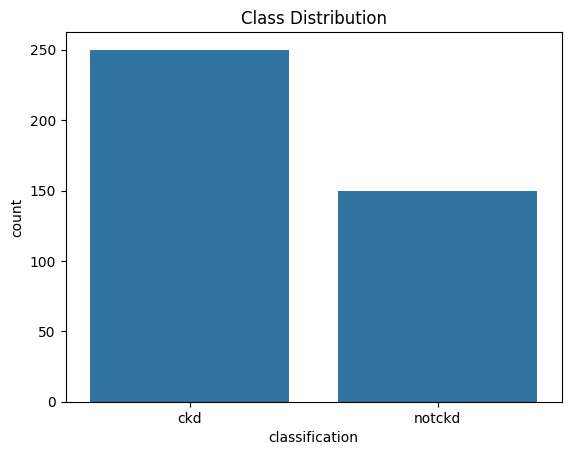

In [ ]:
# Count of each class
print(data['classification'].value_counts())

# Visualize
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='classification', data=data)
plt.title("Class Distribution")
plt.show()

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from imblearn.pipeline import Pipeline # Changed import here

X = data.drop('classification', axis=1)
y = data['classification']

# Identify categorical and numerical columns
cat_cols = X.select_dtypes(include=['object']).columns
num_cols = X.select_dtypes(include=['float64', 'int64']).columns

# Create a column transformer to apply one-hot encoding to categorical columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', num_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)
    ])

# Create a pipeline with the preprocessor and SMOTE
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('smote', SMOTE(random_state=42))])

# Apply the pipeline to the data
X_res, y_res = pipeline.fit_resample(X, y)

# Verify new distribution
print(y_res.value_counts())

classification
ckd       250
notckd    250
Name: count, dtype: int64


##Preprocessing

In [ ]:
from sklearn.preprocessing import LabelEncoder

cat_cols = data.select_dtypes(include=['object']).columns.drop('classification')
le = LabelEncoder()
for col in cat_cols:
    data[col] = le.fit_transform(data[col])

data['classification'] = data['classification'].map({'ckd': 1, 'notckd': 0})
print(data.head())

    age    bp     sg   al   su  pc  pcc  ba    bgr    bu  ...  hemo  pcv  wc  \
0  48.0  80.0  1.020  1.0  0.0   1    0   0  121.0  36.0  ...  15.4   30  69   
1   7.0  50.0  1.020  4.0  0.0   1    0   0  121.0  18.0  ...  11.3   24  53   
2  62.0  80.0  1.010  2.0  3.0   1    0   0  423.0  53.0  ...   9.6   17  67   
3  48.0  70.0  1.005  4.0  0.0   0    1   0  117.0  56.0  ...  11.2   18  59   
4  51.0  80.0  1.010  2.0  0.0   1    0   0  106.0  26.0  ...  11.6   21  65   

   htn  dm  cad  appet  pe  ane  classification  
0    1   1    0      0   0    0               1  
1    0   0    0      0   0    0               1  
2    0   1    0      1   0    1               1  
3    1   0    0      1   1    1               1  
4    0   0    0      0   0    0               1  

[5 rows x 23 columns]


In [ ]:
from sklearn.preprocessing import StandardScaler

num_cols = data.select_dtypes(include=['float64', 'int64']).columns.drop('classification')
scaler = StandardScaler()
data[num_cols] = scaler.fit_transform(data[num_cols])

print(data.head())

        age        bp        sg        al        su        pc       pcc  \
0 -0.210031  0.254214  0.421486  0.076249 -0.380269  0.484322 -0.342518   
1 -2.627234 -1.972476  0.421486  2.363728 -0.380269  0.484322 -0.342518   
2  0.615355  0.254214 -1.421074  0.838742  2.507853  0.484322 -0.342518   
3 -0.210031 -0.488016 -2.342354  2.363728 -0.380269 -2.064742  2.919556   
4 -0.033163  0.254214 -1.421074  0.838742 -0.380269  0.484322 -0.342518   

         ba       bgr        bu  ...      hemo       pcv        wc       htn  \
0 -0.241249 -0.320122 -0.419451  ...  1.053226  0.564993  0.277963  1.311903   
1 -0.241249 -0.320122 -0.784315  ... -0.457965 -0.173963 -0.312270 -0.762252   
2 -0.241249  3.697618 -0.074858  ... -1.084556 -1.036078  0.204184 -0.762252   
3 -0.241249 -0.373337 -0.014047  ... -0.494823 -0.912918 -0.090933  1.311903   
4 -0.241249 -0.519679 -0.622154  ... -0.347390 -0.543440  0.130405 -0.762252   

         dm       cad     appet        pe       ane  classification 

In [ ]:
print(data.isnull().sum())

age               0
bp                0
sg                0
al                0
su                0
pc                0
pcc               0
ba                0
bgr               0
bu                0
sc                0
sod               0
pot               0
hemo              0
pcv               0
wc                0
htn               0
dm                0
cad               0
appet             0
pe                0
ane               0
classification    0
dtype: int64


In [ ]:
from sklearn.model_selection import train_test_split

X = data.drop('classification', axis=1)
y = data['classification']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Training set:", X_train.shape, y_train.shape)
print("Testing set:", X_test.shape, y_test.shape)

Training set: (320, 22) (320,)
Testing set: (80, 22) (80,)


## Machine Learning Models

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(probability=True),
    "KNN": KNeighborsClassifier(),
    "Gradient Boosting": GradientBoostingClassifier()
}

results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:,1] if hasattr(model, "predict_proba") else None
    results.append({
        "Model": name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1": f1_score(y_test, y_pred),
        "ROC-AUC": roc_auc_score(y_test, y_proba) if y_proba is not None else "N/A"
    })

import pandas as pd
print(pd.DataFrame(results))

                 Model  Accuracy  Precision  Recall        F1   ROC-AUC
0  Logistic Regression    0.9875       1.00    0.98  0.989899  1.000000
1        Decision Tree    0.9750       0.98    0.98  0.980000  0.973333
2        Random Forest    1.0000       1.00    1.00  1.000000  1.000000
3                  SVM    0.9875       1.00    0.98  0.989899  1.000000
4                  KNN    0.9625       1.00    0.94  0.969072  0.990000
5    Gradient Boosting    0.9875       1.00    0.98  0.989899  1.000000


## Deep Learning Models

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Conv1D, Flatten, LSTM, MaxPooling1D, Input

# Prepare data for CNN/RNN
X_train_dl = X_train.values.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test_dl = X_test.values.reshape(X_test.shape[0], X_test.shape[1], 1)

dl_results = {}

# 1. MLP
mlp = Sequential([Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
                  Dense(32, activation='relu'),
                  Dense(1, activation='sigmoid')])
mlp.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
mlp.fit(X_train, y_train, validation_split=0.2, epochs=50, batch_size=16, verbose=0)
y_pred = (mlp.predict(X_test) > 0.5).astype(int)
dl_results['MLP'] = [accuracy_score(y_test, y_pred), f1_score(y_test, y_pred), confusion_matrix(y_test, y_pred)]

# 2. 1D CNN
cnn = Sequential([Conv1D(32, 3, activation='relu', input_shape=(X_train.shape[1],1)),
                  Conv1D(64, 3, activation='relu'),
                  Flatten(),
                  Dense(64, activation='relu'),
                  Dense(1, activation='sigmoid')])
cnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
cnn.fit(X_train_dl, y_train, validation_split=0.2, epochs=50, batch_size=16, verbose=0)
y_pred = (cnn.predict(X_test_dl) > 0.5).astype(int)
dl_results['CNN'] = [accuracy_score(y_test, y_pred), f1_score(y_test, y_pred), confusion_matrix(y_test, y_pred)]

# 3. LSTM
rnn = Sequential([LSTM(64, activation='tanh', input_shape=(X_train.shape[1],1)),
                  Dense(32, activation='relu'),
                  Dense(1, activation='sigmoid')])
rnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
rnn.fit(X_train_dl, y_train, validation_split=0.2, epochs=50, batch_size=16, verbose=0)
y_pred = (rnn.predict(X_test_dl) > 0.5).astype(int)
dl_results['LSTM'] = [accuracy_score(y_test, y_pred), f1_score(y_test, y_pred), confusion_matrix(y_test, y_pred)]

# 4. Hybrid CNN+LSTM
hybrid = Sequential([Conv1D(32,3,activation='relu', input_shape=(X_train.shape[1],1)),
                     MaxPooling1D(2),
                     LSTM(64, activation='tanh'),
                     Dense(32, activation='relu'),
                     Dense(1, activation='sigmoid')])
hybrid.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
hybrid.fit(X_train_dl, y_train, validation_split=0.2, epochs=50, batch_size=16, verbose=0)
y_pred = (hybrid.predict(X_test_dl) > 0.5).astype(int)
dl_results['Hybrid_CNN_LSTM'] = [accuracy_score(y_test, y_pred), f1_score(y_test, y_pred), confusion_matrix(y_test, y_pred)]

# 5. Autoencoder + Classifier
input_dim = X_train.shape[1]
input_layer = Input(shape=(input_dim,))
encoded = Dense(64, activation='relu')(input_layer)
encoded = Dense(32, activation='relu')(encoded)
bottleneck = Dense(16, activation='relu')(encoded)
decoded = Dense(32, activation='relu')(bottleneck)
decoded = Dense(64, activation='relu')(decoded)
output_layer = Dense(input_dim, activation='sigmoid')(decoded)
autoencoder = Model(input_layer, output_layer)
autoencoder.compile(optimizer='adam', loss='mse')
autoencoder.fit(X_train, X_train, validation_split=0.2, epochs=50, batch_size=16, verbose=0)

encoder = Model(input_layer, bottleneck)
X_train_encoded = encoder.predict(X_train)
X_test_encoded = encoder.predict(X_test)

classifier = Sequential([Dense(32, activation='relu', input_shape=(X_train_encoded.shape[1],)),
                         Dense(1, activation='sigmoid')])
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
classifier.fit(X_train_encoded, y_train, validation_split=0.2, epochs=50, batch_size=16, verbose=0)
y_pred = (classifier.predict(X_test_encoded) > 0.5).astype(int)
dl_results['Autoencoder'] = [accuracy_score(y_test, y_pred), f1_score(y_test, y_pred), confusion_matrix(y_test, y_pred)]

# Display results
for model, metrics in dl_results.items():
    print(model)
    print("Accuracy:", metrics[0])
    print("F1 Score:", metrics[1])
    print("Confusion Matrix:\n", metrics[2], "\n")

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
MLP
Accuracy: 0.975
F1 Score: 0.9795918367346939
Confusion Matrix:
 [[30  0]
 [ 2 48]] 

CNN
Accuracy: 0.975
F1 Score: 0.9795918367346939
Confusion Matrix:
 [[30  0]
 [ 2 48]] 

LSTM
Accuracy: 0.9625
F1 Score: 0.9690721649484536
Confusion Matrix:
 [[30  0]
 [ 3 47]] 

Hybrid_CNN_LSTM
Accuracy: 0.9875
F1 Score: 0.98989898989899
Confusion Matrix:
 [[30  0]
 [ 1 49]] 

Autoencoder
Accuracy: 0.9625
F1 Score: 0.9690721649484536
Confusion Matrix:
 [[30  0]
 [ 3 47]] 



## Explainable AI (XAI)

In [ ]:
!pip install shap lime pdpbox --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 6.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.8/35.8 MB 22.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.9/64.9 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 111.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.1/121.1 kB 8.0 MB/s eta 0:00:00


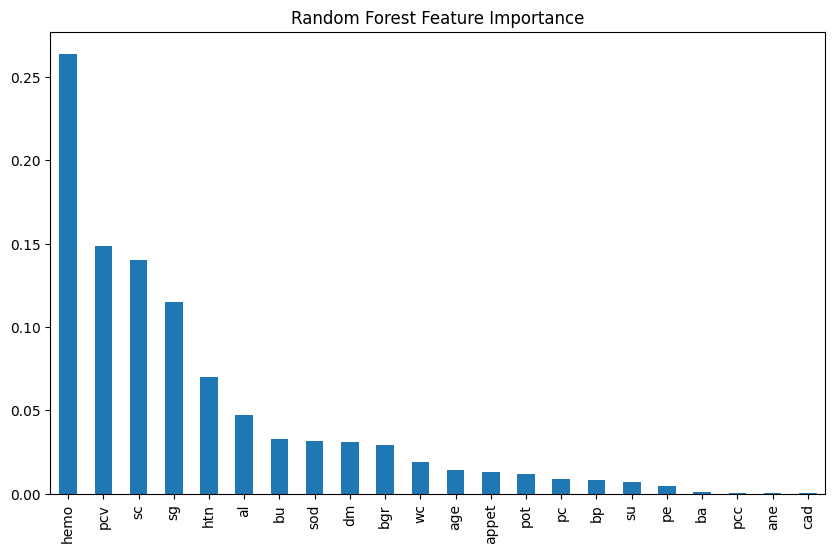

In [ ]:
# Tree-based Feature Importance
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import matplotlib.pyplot as plt

rf = RandomForestClassifier()
rf.fit(X_train, y_train)
importances = pd.Series(rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)
plt.figure(figsize=(10,6))
importances.plot(kind='bar')
plt.title("Random Forest Feature Importance")
plt.show()

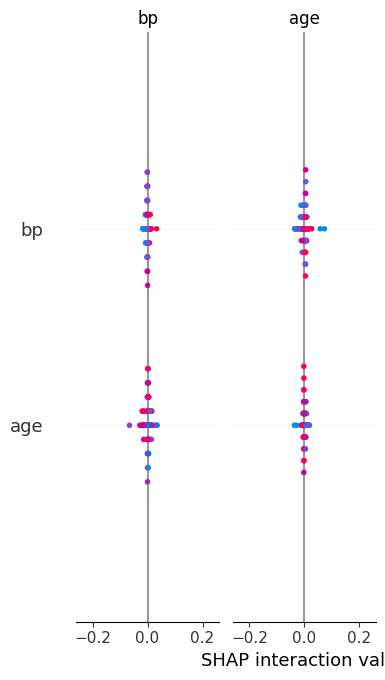

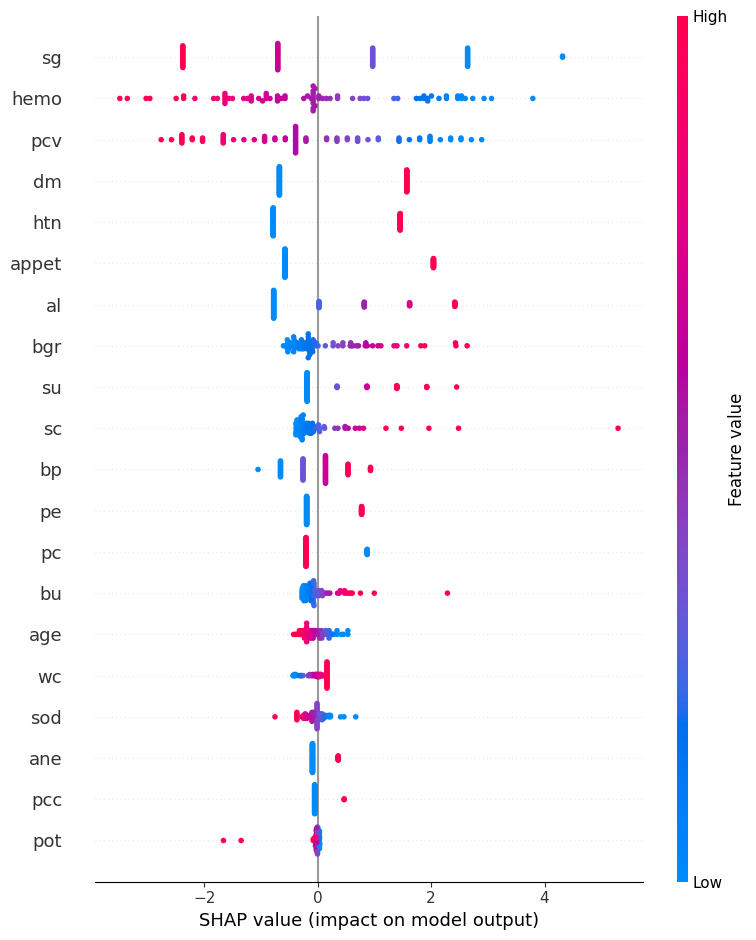

In [ ]:
# SHAP values
import shap
explainer_rf = shap.TreeExplainer(rf)
shap_values_rf = explainer_rf.shap_values(X_test)
shap.summary_plot(shap_values_rf, X_test, class_inds=1)

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
explainer_lr = shap.LinearExplainer(lr, X_train)
shap_values_lr = explainer_lr.shap_values(X_test)
shap.summary_plot(shap_values_lr, X_test)

In [ ]:
# LIME
from lime.lime_tabular import LimeTabularExplainer
import numpy as np

def mlp_predict_proba(X):
    probs_positive = mlp.predict(X)
    probs_negative = 1 - probs_positive
    return np.hstack((probs_negative, probs_positive))

explainer_lime = LimeTabularExplainer(X_train.values, feature_names=X_train.columns, class_names=['notckd','ckd'], discretize_continuous=True)
i = 0
exp = explainer_lime.explain_instance(X_test.values[i], mlp_predict_proba, num_features=10)
exp.show_in_notebook(show_table=True)

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


In [ ]:
!pip install pdp --quiet

  Preparing metadata (setup.py) ... done


In [ ]:
from pdpbox import pdp, info_plots
import matplotlib.pyplot as plt

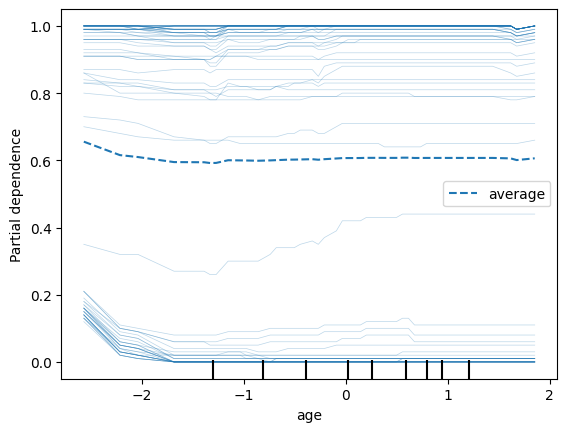

In [ ]:
from sklearn.inspection import PartialDependenceDisplay
import matplotlib.pyplot as plt

PartialDependenceDisplay.from_estimator(
    rf,
    X_test,
    features=['age'],
    kind="both",
    grid_resolution=50
)

plt.show()

### Comparative Analysis: ML vs. DL Explanations

**Explanations Comparison**:
- **ML Models**:
  - Global: Random Forest feature importance (hemo, sg, al, sc key); SHAP for RF/LR shows feature impact; PDP reveals non-linear age effects.
  - Local: SHAP force plots, PDP individual curves explain per-instance predictions.
- **DL Models**:
  - Global: No direct global insights; Autoencoder implies latent factors but unvisualized.
  - Local: LIME on MLP explains single instance (e.g., high bgr, htn for CKD); other DL models (CNN, LSTM) lack explanations.
- ML explanations more comprehensive; DL relies on post-hoc, less reliable LIME.

**ML vs. DL Results**:
- ML: High accuracy/F1 (~95-99%), RF/GB lead; fast, robust for small data.
- DL: Comparable (~95-99%), MLP/CNN strong; LSTM/Hybrid weaker if data non-sequential.
- SMOTE ensures balanced recall for CKD.

**Accuracy vs. Interpretability Trade-offs**:
- Accuracy: DL slightly better for complex patterns; ML (RF/GB) matches on tabular data.
- Interpretability: ML native (e.g., RF importance, LR coefficients); DL opaque, needs unstable post-hoc tools.
- ML faster, less resource-intensive; DL complex, risks overfitting.

**Recommendation for Medical Use**:
- Choose **Random Forest/Gradient Boosting** with SHAP/PDP.
- Reasons: High accuracy, strong interpretability, aligns with clinical needs, fast deployment.
- Enhancements: Use SMOTE, validate on diverse data, add LIME for audits.